In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fnmatch import fnmatch
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import matplotlib as mpl

In [2]:
F = 96485
def stats(x):
    PC = (max(x)-min(x))/x[0]
    SR = (np.round(x[0], 4))
    FR = (np.round(x[-1], 4))
    print('total change:', np.round(max(x)-min(x), 4))
    print('starting ratio:',np.round(x[0], 4))
    print('finishing ratio:', np.round(x[-1], 4))
    print('percent change:',np.round(PC, 4 ))
    return SR, FR, PC
    
    
def regress(x,y):
    trend = np.polyfit(x, y, 1)
    tp = np.poly1d(trend)
    r = np.corrcoef(x,y)
    print('regression equation:', tp)
    print('Pearson correlation:', r)
    print()
    return trend[0], trend[1], r

def OH(pH):
    pOH = 14-pH
    oh = 10**-pOH
    print(oh)
    return oh
def H(pH):
    h = 10**-pH
    print(h)
    return h

def Q(i,t):
    time = t*60 #min*60s/min = seconds
    charge = i*time #(A*s) = C
    mol = charge/F
    print('moles of H and e:', mol)

def per_change(new,orig):
    diff = new-orig
    change = diff/orig
    print('{:.3f}'.format(change), ': {:.3f}%'.format(change*100))
    

In [3]:
S, E, P = stats(r_avg)
print(S)
per_change(H(2.16), H(PHfromR(S, PK, RA, RB)))

NameError: name 'r_avg' is not defined

In [4]:
print(PHfromR(2.9, PK, RA, RB))
print(PHfromR(2.65, PK, RA, RB))
print(RfromPH(7, PK, RA, RB))

NameError: name 'PHfromR' is not defined

In [3]:

hd =  r'C:\Users\Meagan\Documents\pH_changing\New Figures'
folders = [ '\\concentration\\', '\\current\\', '\\SQ\\all_files\\', '\\polarity\\', '\\polarity switching\\']
#folders = ['\\1 M\\', '\\10 mM\\', '\\200 mM\\', '\\new_status_quo\\']
#stds = np.loadtxt(r'C:\Users\Meagan\Documents\pH_changing\December 2019\December 2019 text files\stds.txt', unpack = True)
#spH = stds[0]
#sR = stds[1]
#
SQ = hd+folders[2]
I = hd+folders[1]
C = hd+folders[0]
P = hd+folders[3]
PS = hd+folders[4]
sc = ['red', 'orange', 'green', 'b', 'mediumpurple', 'indigo']

sq = [] #status qua
iC = [] #initial concentration
II = [] #current
pol200 = []
pol10 = []
polsw = []
for f in os.listdir(SQ):
    if f.endswith('.txt'):
        print(f)
        sq.append(f)
for f in os.listdir(I):
    if f.endswith('.txt'):
        print(f)
        II.append(f)
for f in os.listdir(C):
    if f.endswith('.txt'):
        print(f)
        iC.append(f)
for f in os.listdir(P):
    if fnmatch(f, '*sq*.txt'):
        print(f)
        pol200.append(f)
    if fnmatch(f, '*10mM*.txt'):
        pol10.append(f)
        print('a match')
for f in os.listdir(PS):
    if f.endswith('.txt'):
        print(f)
        polsw.append(f)
        
        

t = 'time'
r = '655 / 577'
print(len(sq))
sq_l = len(sq)

LR_200401_pos_sq_2.txt
LR_200406_pos_sq_2.txt
LR_200407_pos_sq_3.txt
LR_200407_pos_sq_4.txt
LR_200408_pos_sq_1.txt
LR_200409_pos_sq.txt
LR_200409_pos_sq_2.txt
LR_200528_pos_sq.txt
LR_200529_pos_sq_2.txt
LR_200601_pos_sq.txt
LR_200601_pos_sq_2.txt
LR_200306_pos_120nA.txt
LR_200409_pos_30nA.txt
LR_200409_pos_30nA_2_X.txt
LR_200410_pos_120nA_2.txt
LR_200410_pos_30nA.txt
LR_200603_pos_120nA.txt
LR_200604_pos_120nA_2b.txt
LR_200605_pos_30nA.txt
LR_200402_10M_60nA_1.txt
LR_200402_10M_60nA_2.txt
LR_200416_pos_1M_60nA_2.txt
LR_200416_pos_1M_60nA_3.txt
LR_200417_pos_1M_60nA_2.txt
LR_200608_pos_1M_4.txt
LR_200612_pos_10M.txt
LR_200615_pos_10M.txt
LR_200330_neg_sq.txt
LR_200330_neg_sq_1.txt
LR_200331_neg_sq.txt
LR_200331_neg_sq_2.txt
LR_200423_neg_sq.txt
LR_200429_neg_sq.txt
a match
a match
LR_200403_polarity_2.txt
LR_200424_pol_switch_control.txt
LR_200428_pol_switch.txt
11


In [4]:
# Based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3364509/
# https://www.ncbi.nlm.nih.gov/pubmed/3838314/
# Note that PK is pKa+log(Sda/Sdb) in that article
def RfromPH(PH,PK,RA,RB):
    return (RB * np.power(10,PH-PK) + RA) / (1 + np.power(10,PH-PK))

def PHfromR(R,PK,RA,RB):
    return (PK+np.log10((R-RA)/(RB-R)))

In [5]:
# Loading data provided by Meagan.
file = r'C:\Users\Meagan\Documents\pH_changing\standards\phosphate_stds\phosphate_stds.txt'
b = np.arange(0, 51, 10)
data = np.loadtxt(file, unpack=True)
pH = data[0]
R = data[1]

[0.04319222 0.35828417]


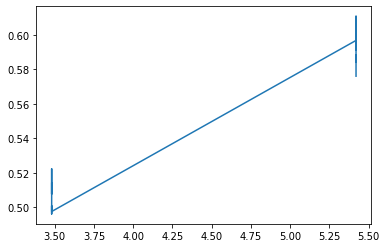

In [6]:
plt.plot(pH[0:16], R[0:16])
trend = np.polyfit(pH[0:16], R[0:16], 1)
print(trend)

[ 7.88986791  0.77896856 17.4912754 ]


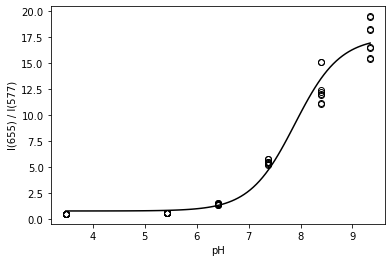

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
popt, pcov = curve_fit(RfromPH, pH, R)

print(popt)
PK,RA,RB = popt

x = np.linspace(pH.min(),pH.max(),100)
y = RfromPH(x,PK,RA,RB)

plt.plot(pH,R,'o', fillstyle='none', color='k')

plt.plot(x,y, color='k')

plt.xlabel('pH')
plt.ylabel('I(655) / I(577)')
#plt.savefig('G:\My Drive\conferences\ASMS 2020\AmPO4_stds.pdf', format = 'pdf')
plt.show()



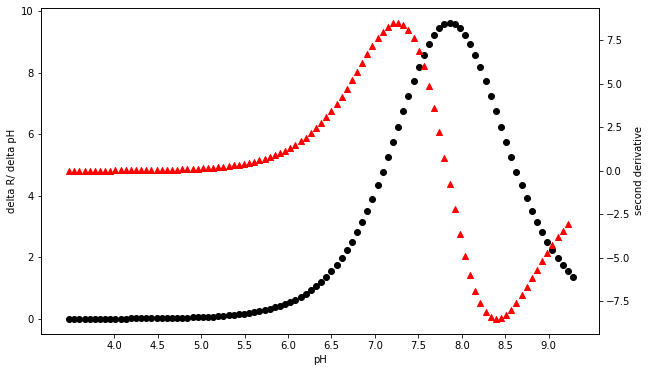

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
ax1 = ax.twinx()
der = np.diff(y)/np.diff(x)
sec_der = np.diff(der)/np.diff(x[:-1])
ax.scatter(x[:-1], der, color= 'k')
ax1.scatter(x[:-2], sec_der, color = 'r', marker = '^')
ax.set_ylabel('delta R/ delta pH')
ax1.set_ylabel('second derivative')
ax.set_xlabel('pH')
ax.set_xticks(np.arange(4, 9.5, 0.5))
plt.savefig('calibration derivative.pdf', format = 'pdf')

In [11]:
print(RfromPH(6,PK, RA, RB))
print(PHfromR(0.781 ,PK,RA,RB))
print(PHfromR(2.46 ,PK,RA,RB))
print(PHfromR(5.45 ,PK,RA,RB))

0.9915903365391355
3.9746882647850232
6.938447916644122
7.47860821364308


LR_200401_pos_sq_2.txt
2.39449149345329
LR_200406_pos_sq_2.txt
2.3126455359062366
LR_200407_pos_sq_3.txt
2.410036916870911
LR_200407_pos_sq_4.txt
2.4796839559260393
LR_200408_pos_sq_1.txt
2.3672479110613587
LR_200409_pos_sq.txt
2.3432354002723317
LR_200409_pos_sq_2.txt
2.5570153622364384
LR_200528_pos_sq.txt
2.5572222681681867
LR_200529_pos_sq_2.txt
2.4324269275464245
LR_200601_pos_sq.txt
2.3369851258058176
LR_200601_pos_sq_2.txt
2.3618497052529586


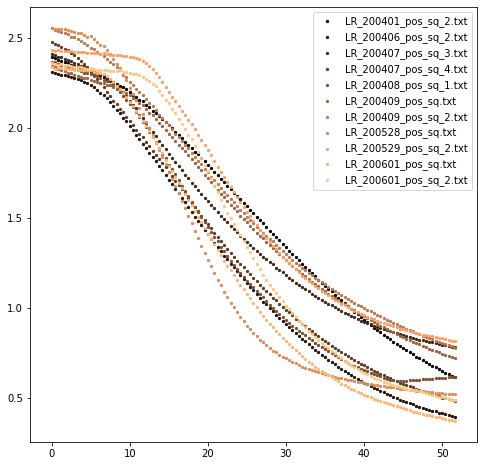

In [16]:

color = mpl.cm.copper(np.linspace(0, 1, len(sq)))
fig, ax = plt.subplots(1, figsize = (8,8))
for i in range(len(sq)):
    print(sq[i])
    data2 = np.loadtxt(SQ+sq[i], unpack = True, skiprows = 1)
    x2 = data2[0]*25/60
    y2 = data2[1]
    print(y2[0])
    ax.scatter(x2, y2, label = sq[i], s = 5, color = color[i])
#ax.scatter(time, r_avg)
ax.legend()

#ax.fill_between(time, RfromPH(i, PK))

In [14]:
#calculate average and 95% CI for status quo experiments 
data2 = np.loadtxt(SQ+sq[0], unpack = True, skiprows = 1)
time = data2[0]*25/60
Ratios = np.zeros((sq_l, 125))
Rat_2 = np.zeros((2, 125))
r_u = []
r_l = []
for i in range(len(sq)):
    print(sq[i])
    data = np.loadtxt(SQ+sq[i], unpack = True, skiprows = 1)
    r2 = data[1]
    Ratios[i,:] = r2
#for i in range(3, 11):
#    print(i)
#    data2 = np.loadtxt(st+sq[i], unpack = True, skiprows = 1)
#    r3 = data2[1]
#    print(r3)
#    Rat_2[i-8,:] = r3
r_avg = np.mean(Ratios, axis = 0)
for i in range(len(Ratios[1])):
    r_u.append(max(Ratios[0,i], Ratios[1,i], Ratios[2,i], Ratios[3,i], Ratios[4,i], Ratios[5,i], Ratios[6,i]))
    r_l.append(min(Ratios[0,i], Ratios[1,i], Ratios[2,i], Ratios[3,i], Ratios[4,i], Ratios[5,i], Ratios[6,i]))
r_std = np.std(Ratios, axis = 0)  
r_CI = (np.std(Ratios, axis = 0)/np.sqrt(10)*2.228)
print(r_avg[0]+r_CI[0])
print(r_avg[0]-r_CI[0])
print(r_avg[0])
#r_avg2 = np.mean(Rat_2, axis = 0)
#r_CI2 = (np.std(Rat_2, axis = 0)/np.sqrt(2)*1.96)
print(np.shape(Ratios))
print(PHfromR(2.356840567007316, PK, RA, RB))
print(PHfromR(2.470948633447227, PK, RA, RB))
print(PHfromR(2.4138946002272714, PK, RA, RB))

LR_200401_pos_sq_2.txt
LR_200406_pos_sq_2.txt
LR_200407_pos_sq_3.txt
LR_200407_pos_sq_4.txt
LR_200408_pos_sq_1.txt
LR_200409_pos_sq.txt
LR_200409_pos_sq_2.txt
LR_200528_pos_sq.txt
LR_200529_pos_sq_2.txt
LR_200601_pos_sq.txt
LR_200601_pos_sq_2.txt
2.470948633447227
2.356840567007316
2.4138946002272714
(11, 125)
6.90797347627657
6.941583775726631
6.925040119959415


65
-1.3632086367418412
7.916666666666667 35.0
65
[-0.01662618  2.42125944]  
-0.05493 x + 2.716  
-0.01734 x + 1.47


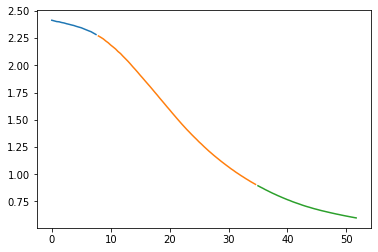

In [15]:
r1 = r_avg[0:19]
rt = time[0:len(r1)]
trend1 = np.polyfit(rt,r1, 1)
tp = np.poly1d(trend1)

r2 = r_avg[19:84]
print(len(r2))
print(r2[64]-r2[0])
r2t = time[19:84]
print(time[19], time[84])
print(len(r2t))
trend2 = np.polyfit(r2t,r2, 1)
tp2 = np.poly1d(trend2)

r3 = r_avg[84:]
r3t = time[84:]
trend3 = np.polyfit(r3t,r3, 1)
tp3 = np.poly1d(trend3)

print(trend1, tp2, tp3)
plt.plot(rt, r1)
plt.plot(r2t, r2)
plt.plot(r3t, r3)

## concentration figure

# status quo figure 

LR_200401_pos_sq_2.txt


NameError: name 'x2' is not defined

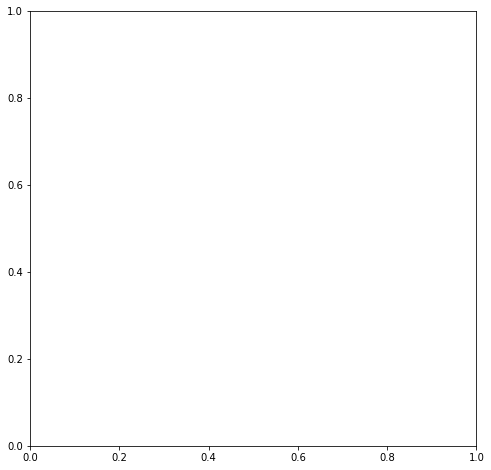

In [16]:
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,len(sq)))
fig, ax = plt.subplots(1, figsize = (8,8))
for i in range(len(sq)):
    print(sq[i])
    data2 = np.loadtxt(SQ+sq[i], unpack = True, skiprows = 1)
    
    y2 = data2[1]
    ax.scatter(x2, y2, label = sq[i], s = 5, color = color[i])
ax.plot(time, r_avg, color = 'k', linewidth = 8)
ax.set_xlim(-1,55)
ax.set_ylim(0.25,2.75)
ax.set_yticks(np.arange(0.3,3.0,0.5))
ax.set_ylabel(r)
ax.set_xlabel(t)
#ax.legend()
#ax.hlines(RfromPH(6.9, PK, RA, RB), 0 , 50, color = 'k', linewidth = 2, linestyle = '--')
print(np.std(r_avg, axis = 0))
#plt.savefig(hd+'\\20619_SQ_traces.pdf', format = 'pdf')
#ax.fill_between(time, RfromPH(i, PK))

In [31]:
#calculate average and 95% CI for 30 and 120 replicates 
data2 = np.loadtxt(SQ+sq[0], unpack = True, skiprows = 1)
time = data2[0]*25.3/60
R_1 = []
Rr_1 = np.zeros((4, 125))
R_10 = []
Rr_10 = np.zeros((4, 125))

for i in range(len(iC)):
    if fnmatch(iC[i], '*1M*.txt'):
        print(iC[i])
        R_1.append(iC[i])
    if fnmatch(iC[i], '*10M*.txt'):
        print(iC[i])
        R_10.append(iC[i])
print(len(R_10), (R_1))        
for i in range(4):
    print(i)
    data2 = np.loadtxt(C+R_10[i], unpack=True, skiprows =1)
    r3 = data2[1]
  
    Rr_10[i,:] = r3
            
for i in range(4):
    data = np.loadtxt(C+R_1[i], unpack = True, skiprows = 1)
    r2 = data[1]
    Rr_1[i,:] = r2
    
r1_std = np.std(Rr_1, axis = 0)  
r1_avg = np.mean(Rr_1, axis = 0)
print(min(r1_avg))
r1_CI = (np.std(Rr_1, axis = 0)/np.sqrt(3)*3.182)

r10_std = np.std(Rr_10, axis =0)
r10_avg = np.mean(Rr_10, axis = 0)
r10_CI = (np.std(Rr_10, axis = 0)/np.sqrt(3)*3.182)

#r_avg2 = np.mean(Rat_2, axis = 0)
#r_CI2 = (np.std(Rat_2, axis = 0)/np.sqrt(2)*1.96)

LR_200402_10M_60nA_1.txt
LR_200402_10M_60nA_2.txt
LR_200416_pos_1M_60nA_2.txt
LR_200416_pos_1M_60nA_3.txt
LR_200417_pos_1M_60nA_2.txt
LR_200608_pos_1M_4.txt
LR_200612_pos_10M.txt
LR_200615_pos_10M.txt
4 ['LR_200416_pos_1M_60nA_2.txt', 'LR_200416_pos_1M_60nA_3.txt', 'LR_200417_pos_1M_60nA_2.txt', 'LR_200608_pos_1M_4.txt']
0
1
2
3
1.4316892503587497


In [ ]:
#figure out region of interest for discussions of electrolyte concentration

# 0 - 10 minutes = 0-24
#10 - 20 minutes = 24-48
#20-30 minutes = 48-72
#30 to end = 72:


In [18]:
r10_1020 = r10_avg[24:48]
r10_2030 = r10_avg[48:72]
r10f = r10_avg[72:]
t1020 = time[24:48]
t2030 = time[48:72]
tf = time[72:]
print('10 mM')
print('first ten')
print(regress(time[:24], r10_avg[:24]))
print('10-20')
regress(t1020, r10_1020)
print('20-30')
regress(t2030, r10_2030)
print('>30')
regress(tf, r10f)
#per_change(.003,.1327)
r1_1020 = r1_avg[24:48]
r1_2030 = r1_avg[24:48]
r1f = r1_avg[72:]
print('1M')
print('first ten')
regress(time[:24], r1_avg[:24])
print('10-20')
regress(t1020, r1_1020)
print('20-30')
regress(t2030, r1_2030)
print('>30')
regress(tf, r1f)

10 mM
first ten
regression equation:  
-0.1145 x + 2.224
Pearson correlation: [[ 1.         -0.99663732]
 [-0.99663732  1.        ]]

(-0.11453618831034182, 2.2239704035858803, array([[ 1.        , -0.99663732],
       [-0.99663732,  1.        ]]))
10-20
regression equation:  
-0.04728 x + 1.575
Pearson correlation: [[ 1.         -0.99190169]
 [-0.99190169  1.        ]]

20-30
regression equation:  
-0.01771 x + 1.005
Pearson correlation: [[ 1.        -0.9939379]
 [-0.9939379  1.       ]]

>30
regression equation:  
-0.004664 x + 0.6042
Pearson correlation: [[ 1.        -0.9725985]
 [-0.9725985  1.       ]]

1M
first ten
regression equation:  
-0.00733 x + 2.93
Pearson correlation: [[ 1.         -0.97184424]
 [-0.97184424  1.        ]]

10-20
regression equation:  
-0.009801 x + 2.961
Pearson correlation: [[ 1.         -0.99666649]
 [-0.99666649  1.        ]]

20-30
regression equation:  
-0.009801 x + 3.061
Pearson correlation: [[ 1.         -0.99666649]
 [-0.99666649  1.        ]]

>

(-0.05131331625022507, 4.119472839273093, array([[ 1.       , -0.9990118],
        [-0.9990118,  1.       ]]))

regression equation:  
-0.1159 x + 2.224
Pearson correlation: [[ 1.         -0.99663732]
 [-0.99663732  1.        ]]

regression equation:  
-0.007418 x + 2.93
Pearson correlation: [[ 1.         -0.97184424]
 [-0.97184424  1.        ]]


later part stats
10mM
regression equation:  
-0.00472 x + 0.6042
Pearson correlation: [[ 1.        -0.9725985]
 [-0.9725985  1.       ]]

1M
regression equation:  
-0.05193 x + 4.119
Pearson correlation: [[ 1.        -0.9990118]
 [-0.9990118  1.       ]]



(-0.05192907604522777, 4.119472839273093, array([[ 1.       , -0.9990118],
        [-0.9990118,  1.       ]]))

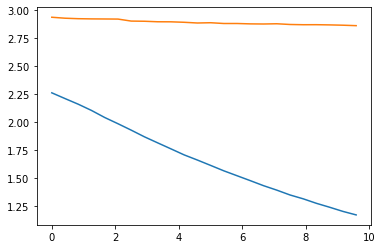

In [80]:
r1_time = time[:24]
r2_time = time[72:]


r10_1 = r10_avg[:24]
r10_2 = r10_avg[72:]

r1_1 = r1_avg[:24]
r1_2 = r1_avg[72:]

plt.plot(r1_time, r10_1)
plt.plot(r1_time, r1_1)

regress(r1_time, r10_1)
regress(r1_time, r1_1)

print('')
print('later part stats')
print('10mM')
regress(r2_time, r10_2)
print('1M')
regress(r2_time, r1_2)

(0.09079358108404403, 3.2556175999420414)


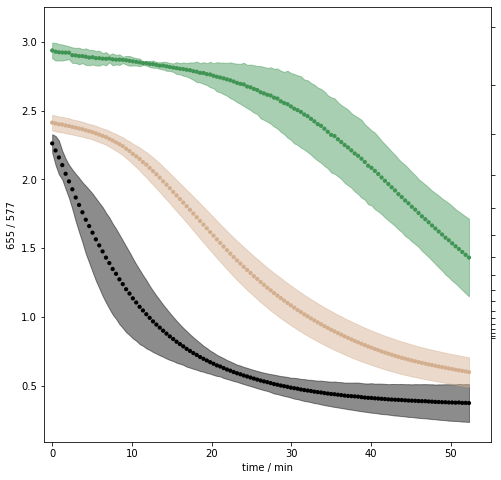

In [19]:
fig, ax = plt.subplots(1, figsize = (8,8))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,3))
mute = (r'C:\Users\Meagan\Documents\pH_changing\May 2020\200611_pos_1M\LR_200611_pos_1M.txt')
muted = np.loadtxt(mute, unpack = True, skiprows = 1 )
mutedY = muted[1]
r10_u = []
r10_l = []

r1_u = []
r1_l = []


#r120_avg = np.mean(Rr_120, axis = 0)

#for i in range(len(r_avg)):
#    r10_u.append(max(Rr_10[0,i], Rr_10[1,i], Rr_10[2,i]))
#    r10_l.append(min(Rr_10[0,i], Rr_10[1,i], Rr_10[2,i]))
    
#    r1_u.append(max(Rr_1[0,i], Rr_1[1,i], Rr_1[2,i], Rr_1[3,i]))
 #   r1_l.append(min(Rr_1[0,i], Rr_1[1,i], Rr_1[2,i], Rr_1[3,i]))

for i in np.arange(5.5,7.2,0.1):
    ax.hlines(RfromPH(i, PK, RA, RB), 55,55.5, linewidth = 0.8, clip_on = False, color = 'k', label = np.round(i, 2))

    
ax.fill_between(time, r10_avg-r10_CI, r10_avg+r10_CI, color = color[0], alpha =  0.45)
ax.scatter(time, r10_avg,color = color[0], s = 5, facecolor = 'none', linewidths = 2)
#ax.errorbar(time, r10_avg,color = 'k', yerr=r10_std, alpha = 0.45)

ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = color[2], alpha =  0.45)
ax.scatter(time, r_avg,color = color[2], s = 5, facecolor = 'none', linewidths = 2)
#ax.errorbar(time, r_avg, yerr = r_std, color = color[2], alpha = 0.45)

ax.fill_between(time, r1_avg-r1_CI, r1_avg+r1_CI, color = color[1], alpha =  0.45)
ax.scatter(time, r1_avg, color = color[1], s = 5, facecolor = 'none', linewidths = 2)
#ax.errorbar(time, r1_avg,color = 'k', yerr = r1_std, alpha = 0.45)

ax.set_xlim(-1, 55)
ax.set_ylabel('655 / 577')
ax.set_xlabel('time / min')
#ax.legend()
print(ax.get_ylim())

#plt.savefig(hd+'\\200618_concentration.pdf', format = 'pdf')

4
0
1
2
3


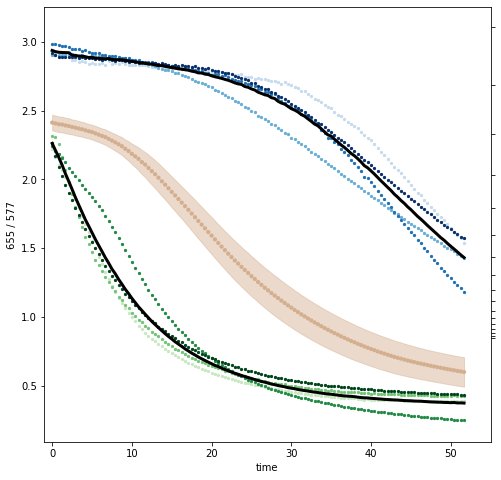

In [27]:
fig, ax = plt.subplots(1, figsize = (8,8))
blue = mpl.cm.Greens(np.linspace(0.25,1.0,4))
green = mpl.cm.Blues(np.linspace(0.25,1.0,4))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,3))
ten = []
one = []
ax.plot(time, r10_avg, color = 'k', linewidth = 3, zorder = 12)
ax.plot(time, r1_avg, color = 'k', linewidth = 3, zorder = 12)
for i in range(len(iC)):
    if fnmatch(iC[i], '*1M*.txt'):
        one.append(iC[i])
        
    if fnmatch(iC[i], '*10M*.txt'):
        ten.append(iC[i])
    #, label = sq[i], s = 5, color = color[i])
print(len(ten))
for i in range(4):
    print(i)
    data1 = np.loadtxt(C+one[i], unpack = True, skiprows = 1)
    y = data1[1]
    ax.scatter(time, y, color = green[i], s = 5, linewidth = None)
    data10 = np.loadtxt(C+ten[i], unpack = True, skiprows = 1)
    y2 = data10[1]
    ax.scatter(time, y2, color = blue[i], s = 5, linewidth = None )
ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = color[2], alpha =  0.45)
ax.scatter(time, r_avg,color = color[2], s = 5, facecolor = 'none', linewidths = 2)
ax.set_xlim(-1,55)
#ax.set_ylim(0.25,2.75)
#ax.set_yticks(np.arange(0.3,3.0,0.5))
ax.set_ylabel(r)
ax.set_xlabel(t)
ax.set_ylim(0.09079358108404403, 3.2556175999420414)
for i in np.arange(5.5,7.2,0.1):
    ax.hlines(RfromPH(i, PK, RA, RB), 55,55.5, linewidth = 0.8, clip_on = False, color = 'k', label = np.round(i, 2))

#plt.savefig(hd+'\\200619_Concentration_traces.pdf', format = 'pdf')

#ax.fill_between(b, RfromPH(6.9,PK,RA,RB),RfromPH(7.0,PK,RA,RB), color = 'k', alpha = 0.4)
#ax.fill_between(b, RfromPH(6.85,PK,RA,RB),RfromPH(6.9,PK,RA,RB), color = 'k', alpha = 0.3)
#for i in range(len(r_avg)):
#    if r_avg[i] < 1.0:
#        print(r_avg[i], time[i])

In [30]:
for i in range(len(r1_avg)):
    if PHfromR(r10_avg[i], PK, RA, RB) < 6:
        print(time[i])
print(min(r1_avg))    

12.5
12.916666666666666
13.333333333333334
13.75
14.166666666666666
14.583333333333334
15.0
15.416666666666666
15.833333333333334
16.25
1.4316892503587497


C:\Users\Meagan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


In [25]:
for i in np.arange(0.5, 2.6, 0.5):
    print(i)

0.5
1.0
1.5
2.0
2.5


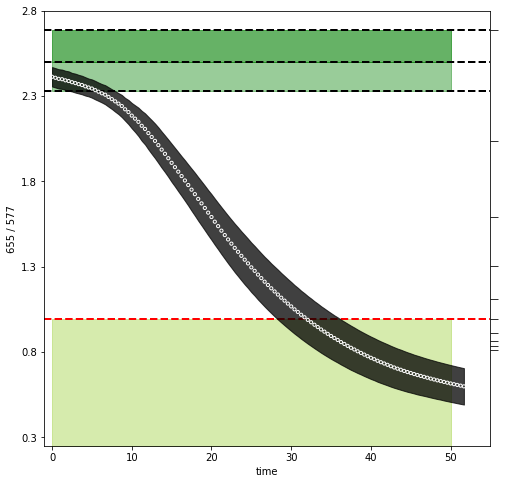

In [28]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.fill_between(b, RfromPH(6.9,PK,RA,RB),RfromPH(6.95,PK,RA,RB), color = 'g', alpha = 0.4)
ax.fill_between(b, RfromPH(6.95,PK,RA,RB),RfromPH(7.0,PK,RA,RB), color = 'g', alpha = 0.6)
ax.fill_between(b, 0.25,RfromPH(6.0,PK,RA,RB), color = 'yellowgreen', alpha = 0.4, zorder = 1)
ax.hlines(RfromPH(6.0, PK, RA, RB), -1, 55, color = 'r', linewidth = 2, linestyle = '--')
ax.hlines(RfromPH(6.9, PK, RA, RB), -1, 55, color = 'k', linewidth = 2, linestyle = '--')
ax.hlines(RfromPH(6.95, PK, RA, RB),  -1, 55, color = 'k', linewidth = 2, linestyle = '--')
ax.hlines(RfromPH(7.0, PK, RA, RB),  -1, 55, color = 'k', linewidth = 2, linestyle = '--')
#ax.fill_between(b, RfromPH(6.85,PK,RA,RB),RfromPH(6.9,PK,RA,RB), color = 'k', alpha = 0.3)
#ax.fill_between(b, RfromPH(5.0,PK,RA,RB),RfromPH(6.0,PK,RA,RB), color = 'r', alpha = 0.2)
#ax1 = ax.twinx()
#ax1.set_ylim(0.25,2.75)




#ax.annotate(7.3, (25,RfromPH(7.3, PK, RA, RB)+0.02))
#ax.annotate(7.0, (45,RfromPH(7.0, PK, RA, RB)))

for i in np.arange(5.2,7.2,0.2):
    ax.hlines(RfromPH(i, PK, RA, RB), 55,56, linewidth = 0.8, clip_on = False, color = 'k')

    
data2 = np.loadtxt(SQ+sq[0], unpack = True, skiprows = 1)
time = data2[0]*25/60


ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = 'k', alpha =  0.75, zorder = 10)

ax.scatter(time, r_avg,color = 'w', s = 10, facecolor = 'none', linewidths = None, zorder = 12)

#ax.scatter(time, np.median(Ratios, axis = 0))
#ax.fill_between(time, r_avg+(np.std(Ratios, axis = 0)**2), r_avg-(np.std(Ratios, axis =0)**2), color = 'r', alpha =  0.45)
#ax.scatter(time, r_avg,color = color[2], s = 5, facecolor = 'none', linewidths = 2)
#ax.legend()
ax.set_xlim(-1,55)
ax.set_ylim(0.25,2.75)
ax.set_yticks(np.arange(0.3,3.0,0.5))
ax.set_ylabel(r)
ax.set_xlabel(t)
#plt.savefig('pos_status_quo.pdf', format = 'pdf')
#plt.savefig('G:\My Drive\Group Meetings\\200218\\pos_status_quo.png', format = 'png')

#plt.savefig(hd+'\\200618_SQ.pdf', format = 'pdf')
plt.show()

# make a figure for the effect of current in +/- mode

In [20]:
#calculate average and 95% CI for 30 and 120 replicates 
data2 = np.loadtxt(SQ+sq[0], unpack = True, skiprows = 1)
time = data2[0]*25/60
R_120 = []
Rr_120 = np.zeros((4, 125))
R_30 = []
Rr_30 = np.zeros((4, 125))
for i in range(len(II)):
    if fnmatch(II[i], '*120*.txt'):
        R_120.append(II[i])
    if fnmatch(II[i], '*30nA*.txt'):
        print(II[i])
        R_30.append(II[i])
        
for i in range(4):

    data2 = np.loadtxt(I+R_30[i], unpack=True, skiprows =1)
    r3 = data2[1]
    Rr_30[i,:] = r3
    
for i in range(4):
    print(i)
    data = np.loadtxt(I+R_120[i], unpack = True, skiprows = 1)
    r2 = data[1]
    Rr_120[i,:] = r2
  
            

r30_avg = np.average(Rr_30, axis = 0)
r30_std = (np.std(Rr_30, axis = 0))#/np.sqrt(2)*4.303)
r30_CI = (np.std(Rr_30, axis = 0)/np.sqrt(3)*3.182)
r30_u = []
r30_l = []

r120_u = []
r120_l = []


r120_avg = np.average(Rr_120, axis = 0)
r120_std = (np.std(Rr_120, axis = 0))
r120_CI = (np.std(Rr_120, axis = 0)/np.sqrt(3)*3.182)
for i in range(len(Rr_30[1])):
    r30_u.append(max(Rr_30[0,i], Rr_30[1,i], Rr_30[2,i]))
    r30_l.append(min(Rr_30[0,i], Rr_30[1,i], Rr_30[2,i]))
    
    r120_u.append(max(Rr_120[0,i], Rr_120[1,i],  Rr_120[2,i]))
    r120_l.append(min(Rr_120[0,i], Rr_120[1,i],  Rr_120[2,i]))
#r_avg2 = np.mean(Rat_2, axis = 0)
#r_CI2 = (np.std(Rat_2, axis = 0)/np.sqrt(2)*1.96)

LR_200409_pos_30nA.txt
LR_200409_pos_30nA_2_X.txt
LR_200410_pos_30nA.txt
LR_200605_pos_30nA.txt
0
1
2
3


0
1
2
3


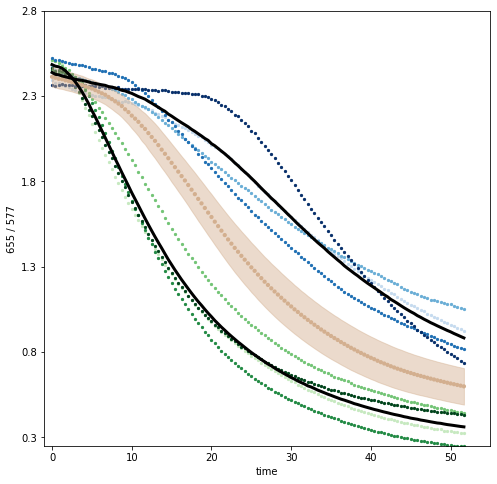

In [96]:
fig, ax = plt.subplots(1, figsize = (8,8))
blue = mpl.cm.Greens(np.linspace(0.25,1.0,4))
green = mpl.cm.Blues(np.linspace(0.25,1.0,4))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,3))
ax.plot(time, r120_avg, color = 'k', linewidth = 3, zorder = 12)
ax.plot(time, r30_avg, color = 'k', linewidth = 3, zorder = 12)

for i in range(4):
    print(i)
    data1 = np.loadtxt(I+R_120[i], unpack = True, skiprows = 1)
    y = data1[1]
    ax.scatter(time, y, color = blue[i], s = 5, linewidth = None)
    data10 = np.loadtxt(I+R_30[i], unpack = True, skiprows = 1)
    y2 = data10[1]
    ax.scatter(time, y2, color = green[i], s = 5, linewidth = None )
ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = color[2], alpha =  0.45)
ax.scatter(time, r_avg,color = color[2], s = 5, facecolor = 'none', linewidths = 2)

ax.set_xlim(-1,55)
ax.set_ylim(0.25,2.75)
ax.set_yticks(np.arange(0.3,3.0,0.5))
ax.set_ylabel(r)
ax.set_xlabel(t)


#plt.savefig(hd+'\\200619_Current_traces.pdf', format = 'pdf')
#ax.fill_between(b, RfromPH(6.9,PK,RA,RB),RfromPH(7.0,PK,RA,RB), color = 'k', alpha = 0.4)
#ax.fill_between(b, RfromPH(6.85,PK,RA,RB),RfromPH(6.9,PK,RA,RB), color = 'k', alpha = 0.3)
#for i in range(len(r_avg)):
#    if r_avg[i] < 1.0:
#        print(r_avg[i], time[i])

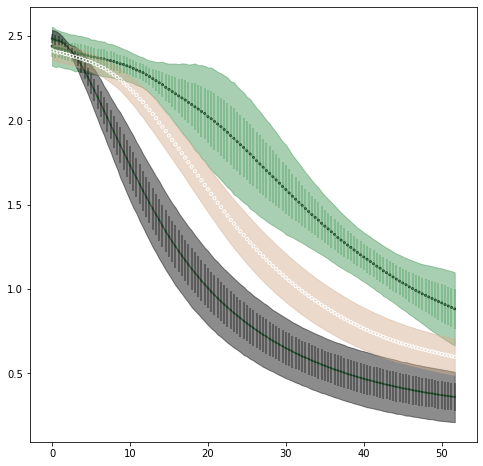

In [49]:
fig, ax = plt.subplots(figsize = (8,8))

ax.errorbar(time, r30_avg, yerr=r30_std, color = color[1], alpha =  0.45)
ax.fill_between(time, r30_avg-r30_CI, r30_avg+r30_CI, color = color[1], alpha =  0.45)
ax.scatter(time, r30_avg,color = color[0], s = 3, facecolor = 'none', linewidths = 1)

ax.errorbar(time, r120_avg, yerr = r120_std, color = color[0], alpha =  0.45)
ax.fill_between(time, r120_avg-r120_CI, r120_avg+r120_CI, color = color[0], alpha =  0.45)
ax.scatter(time, r120_avg,color = color[1], s = 3, facecolor = 'none', linewidths = 1)
ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = color[2], alpha =  0.45)
ax.scatter(time, r_avg,color = 'w', s = 10, facecolor = 'none', linewidths = None, zorder = 12)
#ax.hlines(RfromPH(4.25, PK, RA, RB), 0, 50)
plt.savefig(hd+'\\200619_current.pdf', format = 'pdf')

LR_200402_10M_60nA_1.txt
2.510159316728689
LR_200402_10M_60nA_2.txt
2.396532913817767
LR_200416_pos_1M_60nA_2.txt
2.4725507126303343
LR_200416_pos_1M_60nA_3.txt
2.5139245833345214
LR_200417_pos_1M_60nA_2.txt
2.5237600614905857
LR_200608_pos_1M_4.txt
2.452014240752445
LR_200612_pos_10M.txt
2.463867500105056
LR_200615_pos_10M.txt
2.369258849691081


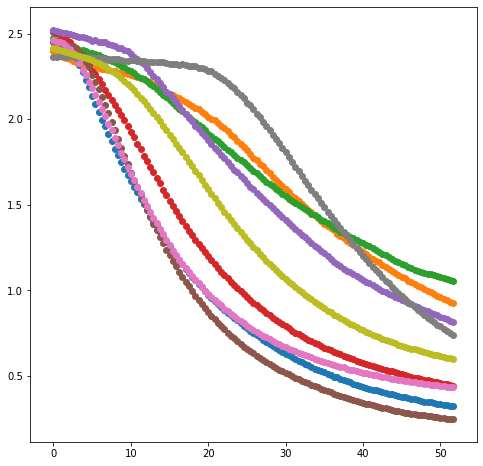

In [47]:
fig, ax = plt.subplots(1, figsize = (8,8))
for i in range(len(II)):
    print(iC[i])
    data2 = np.loadtxt(I+II[i], unpack = True, skiprows = 1)
    x2 = data2[0]*25/60
    y2 = data2[1]
    print(max(y2))
    ax.scatter(x2, y2)#, label = sq[i], s = 5, color = color[i])
    
ax.scatter(time, r_avg)

In [70]:
#old figure 

#ax.fill_between(time, r30_u, r30_l, color = color[0], alpha =  0.45)
#ax.scatter(time, r30_avg,color = color[0], s = 3, facecolor = 'none', linewidths = 1)

#ax.fill_between(time, r120_l, r120_u, color = color[1], alpha =  0.45)
#ax.scatter(time, r120_avg,color = color[1], s = 3, facecolor = 'none', linewidths = 1)
print(len(Rr_30))

3


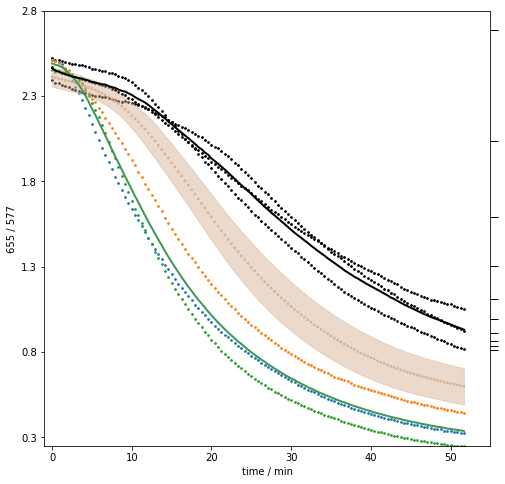

In [171]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,3))


for i in range(len(Rr_30)):
    ax.scatter(time, Rr_30[i,:], color = color[0], s = 3)
    #print(Rr_30[i, 0], Rr_120[i,0])
    

for i in range(len(Rr_120)):
    
    #print(Rr_30[i, 0], Rr_120[i,0])
    ax.scatter(time, Rr_120[i, :], s = 3)

ax.fill_between(time, r_avg-r_CI, r_avg+r_CI, color = color[2], alpha =  0.45)
ax.scatter(time, r_avg,color = color[2], s = 3, facecolor = 'none', linewidths = 1)

ax.plot(time, r120_avg,color = color[1],  lw = 2) 
ax.plot(time, r30_avg,color = color[0],  lw = 2)

for i in np.arange(5.20, 7.1, 0.2):
    ax.hlines(RfromPH(i, PK, RA, RB),55, 56,  label = np.round(i,1), linewidth = 1, clip_on = False)
#ax.legend()
ax.set_ylabel('655 / 577')
ax.set_xlabel('time / min')
ax.set_xlim(-1,55)
ax.set_ylim(0.25,2.75)
ax.set_yticks(np.arange(0.3,3.0,0.5))
#plt.savefig(hd+'\\Effect of I manu v02 NEW.pdf', format = 'pdf')

In [79]:
for i in range(len(time)):
    if time[i] > 30 and time[i] < 35:
        print(time[i], [i])

30.360000000000003 [72]
30.78166666666667 [73]
31.203333333333333 [74]
31.625 [75]
32.04666666666667 [76]
32.468333333333334 [77]
32.89 [78]
33.31166666666667 [79]
33.733333333333334 [80]
34.155 [81]
34.57666666666667 [82]
34.998333333333335 [83]


In [85]:
#30 nA rates of change
r1_30 = r30_avg[:24] #first ten minutes
r1t = time[:24]
regress(r1t,r1_30)

r2_30 = r30_avg[24:48] #10 minutes to 20 minutes
r2t = time[24:48] 
regress(r2t, r2_30)

r3_30 = r30_avg[48:72] #10 minutes to 20 minutes
r3t = time[48:72] 
regress(r3t, r3_30)


r4_30 = r30_avg[72:] #30 minutes to end (52 minutes)
r4t = time[72:]
regress(r4t, r4_30)

stats(r30_avg)


regression equation:  
-0.0111 x + 2.434
Pearson correlation: [[ 1.         -0.99762438]
 [-0.99762438  1.        ]]

regression equation:  
-0.02952 x + 2.623
Pearson correlation: [[ 1.         -0.99858852]
 [-0.99858852  1.        ]]

regression equation:  
-0.04393 x + 2.913
Pearson correlation: [[ 1.         -0.99938281]
 [-0.99938281  1.        ]]

regression equation:  
-0.03256 x + 2.517
Pearson correlation: [[ 1.         -0.99378144]
 [-0.99378144  1.        ]]

total change: 1.5564
starting ratio: 2.4391
finishing ratio: 0.8827
percent change: 0.6381


(2.4391, 0.8827, 0.6381157250781662)

In [24]:
for i in range(len(r30_avg)):
    if PHfromR(r30_avg[i], PK, RA, RB) < 6:
        print(time[i])
    

47.083333333333336
47.5
47.916666666666664
48.333333333333336
48.75
49.166666666666664
49.583333333333336
50.0
50.416666666666664
50.833333333333336
51.25
51.666666666666664


In [84]:
#status quo rates of change

r1 = r_avg[0:24]
rt = time[0:24]

regress(rt, r1)


r2 = r_avg[24:48]
r2t = time[24:48]
regress(r2t, r2)


r3 = r_avg[48:72]
r3t = time[48:72]
regress(r3t, r3)

r4 = r_avg[72:]
r4t = time[72:]
regress(r4t, r4)

PC = (max(r_avg)-min(r_avg))/r_avg[0]

stats(r_avg)


regression equation:  
-0.02039 x + 2.432
Pearson correlation: [[ 1.        -0.9781174]
 [-0.9781174  1.       ]]

regression equation:  
-0.06038 x + 2.81
Pearson correlation: [[ 1.         -0.99912944]
 [-0.99912944  1.        ]]

regression equation:  
-0.05293 x + 2.631
Pearson correlation: [[ 1.         -0.99797665]
 [-0.99797665  1.        ]]

regression equation:  
-0.02105 x + 1.638
Pearson correlation: [[ 1.         -0.98146466]
 [-0.98146466  1.        ]]

total change: 1.8153
starting ratio: 2.4139
finishing ratio: 0.5986
percent change: 0.752


(2.4139, 0.5986, 0.7520354522763302)

In [22]:
#120 nA rates of changes 
r1_120 = r120_avg[0:24]
regress(r1t, r1_120)


r2_120 = r120_avg[24:48]
regress(r2t, r2_120)

r3_120 = r120_avg[48:72]
regress(r3t, r3_120)

r4_120 = r120_avg[72:]
regress(r4t, r4_120)

stats(r120_avg)

NameError: name 'r120_avg' is not defined

In [94]:
values = np.array([0.05495,0.0522,0.04159])
print(np.std(values)/np.average(values))

values = np.array([0.0771,0.02421,0.01256])
print(np.std(values)/np.average(values))

0.11618089627304551
0.7399008913896177


LR_200306_pos_120nA.txt
LR_200409_pos_30nA.txt
LR_200410_pos_120nA_2.txt
LR_200410_pos_30nA.txt


Text(0, 0.5, '655 / 577')

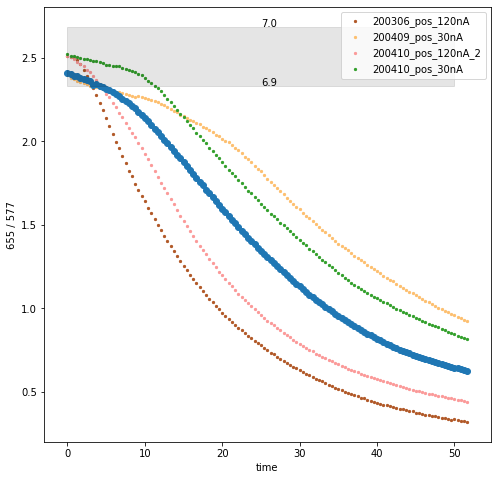

In [168]:
fig, ax1 = plt.subplots(1, 1, figsize = (8,8))

for i in range(len(II)):
    print(II[i])
    data = np.loadtxt(I+II[i], unpack = True, skiprows = 1)
    ax1.scatter(data[0]*25/60, data[1], s = 5, label = II[i][3:-4], color = cm(float(1/(i+1))))
ax1.legend()
ax1.scatter(time, r_avg)
ax1.fill_between(b, RfromPH(6.9, PK, RA, RB), RfromPH(7.0, PK, RA, RB), color = 'k', alpha = 0.1)
ax1.annotate(6.9, (25, RfromPH(6.9, PK, RA, RB)))
ax1.annotate(7.0, (25,RfromPH(7.0, PK, RA, RB)))
ax1.set_xlabel(t)
ax1.set_ylabel(r)
#ax2.annotate('will have negative data', (0.25, 0.5), size = 25)
#plt.savefig('effect of current.pdf', format = 'pdf')
#plt.savefig('G:\My Drive\pH changes\\March 2020\\effect of current.pdf', format = 'pdf')
#plt.savefig('G:\My Drive\pH changes\\March 2020\\effect of current.png', format = 'png')

# make a figure for effect of initial pH 

0_LR_191211_pos_200_60_pH8.txt
difference = 9.83862355191922
23.333333333333332 0.9786536459572981
23.75 0.9462860575106786
24.166666666666668 0.920642643607841
24.583333333333332 0.895166561351088
25.0 0.8698842284365096
25.416666666666668 0.845520588762288
25.833333333333332 0.8224594920939529
26.25 0.7992435958852706
26.666666666666668 0.7773232098080524
27.083333333333332 0.7585999925104595
27.5 0.7390815002805825
27.916666666666668 0.720838441411503
28.333333333333332 0.7040162715792249
28.75 0.6859620645710389
29.166666666666668 0.6690562926199544
29.583333333333332 0.6534749106898377
30.0 0.6388002966752739
30.416666666666668 0.6254198045636548
30.833333333333332 0.6110979997831986
31.25 0.595595135681905
31.666666666666668 0.585078056632382
32.083333333333336 0.5736561710821603
32.5 0.5595727309294023
32.916666666666664 0.5498482000555865
33.333333333333336 0.5391771563526602
33.75 0.5289556498567957
34.166666666666664 0.5208109901893354
34.583333333333336 0.5104899883831949
35

Text(0, 0.5, '[0.94586198 0.93405098 0.92220484 0.91664696 0.90894714 0.8931122\n 0.87586288]')

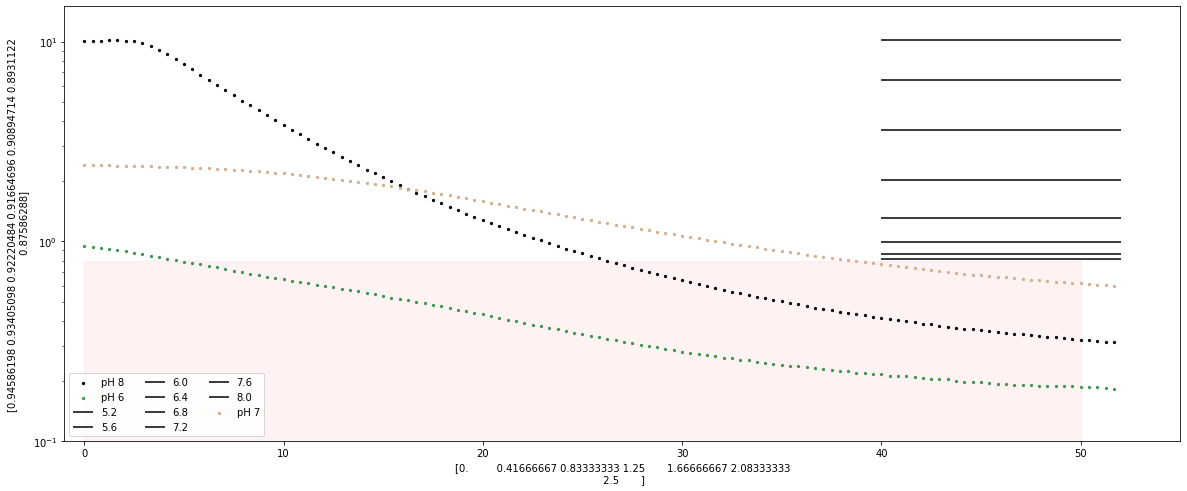

In [59]:
fig, ax = plt.subplots(1, figsize = (20,8))

pH_dir = r'C:\Users\Meagan\Documents\pH_changing\New Figures\Initial pH\\'
p = []
labels = ['pH 8','pH 6']
#ax.fill_between(b, RfromPH(5.9,PK,RA,RB),RfromPH(6.0,PK,RA,RB), color = 'k', alpha = 0.4)
#ax.fill_between(b, RfromPH(6.9,PK,RA,RB),RfromPH(7.0,PK,RA,RB), color = 'k', alpha = 0.3)
#ax.fill_between(b, RfromPH(7.9,PK,RA,RB),RfromPH(8.0,PK,RA,RB), color = 'k', alpha = 0.2)
ax.fill_between(b, 0,RfromPH(5.0,PK,RA,RB), color = 'r', alpha = 0.05)
#ax.annotate(6.0, (40,RfromPH(6.0, PK, RA, RB)))
#ax.annotate(7.0, (40,RfromPH(7.0, PK, RA, RB)))
#ax.annotate(8.0, (40,RfromPH(8.0, PK, RA, RB)))

for f in os.listdir(pH_dir):
    if f.endswith('.txt'):
        p.append(f)
        
color = mpl.cm.gist_earth(np.linspace(0.0,0.85,3))
for i in range(len(p)):
    print(p[i])
    data = np.loadtxt(pH_dir + p[i], unpack = True, skiprows = 1)
    x = data[0]*25/60
    y = data[1]
    print('difference =', y.max()-y.min())

    for j in range(len(y)):
        if y[j] < 0.991:
            print(x[j], y[j])

    r1 = y[:24]
    rt = x[:24]
    regress(rt, r1)


    r2 = y[24:48]
    r2t = x[24:48]
    regress(r2t, r2)


    r3 = y[48:72]
    r3t = x[48:72]
    regress(r3t, r3)

    r4 = y[72:]
    r4t = x[72:]
    regress(r4t, r4)
    
    print('max:', np.max(y), 'min:', np.min(y))
    #ax.vlines(i,np.min(y), np.max(y), lw = 20, color = cm(float(1/(i+1))), alpha = 0.75 )
    ax.scatter(x, y, s=5, label = labels[i], color = color[i] )
for i in np.arange(5.20, 8.20, 0.40):
    ax.hlines(RfromPH(i, PK, RA, RB), 40, 52,  label = np.round(i,1))
ax.scatter(time, r_avg, color = color[2], s = 5, label = 'pH 7')   
ax.legend(ncol = 3, loc = 'lower left')
plt.yscale('log')
ax.set_ylim(0.1, 15)
ax.set_xlim(-1, 55)
ax.set_xlabel(t)
ax.set_ylabel(r)
#plt.savefig('effect of pHi.pdf', format = 'pdf')
#plt.savefig('G:\My Drive\Group Meetings\\200218\\effect of pHi.png', format = 'png')
#plt.savefig(hd+'\\Effect of pH v03 post.pdf', format = 'pdf')

## effect of polarity figure

LR_200330_neg_sq.txt
LR_200330_neg_sq_1.txt
LR_200331_neg_sq.txt
LR_200331_neg_sq_2.txt
LR_200423_neg_sq.txt
LR_200429_neg_sq.txt
(array([2.4138946 , 2.40790305, 2.40167784, 2.39949277, 2.3930695 ,
       2.3888934 , 2.38208075, 2.3767702 , 2.37073839, 2.36547257,
       2.3576624 , 2.35114514, 2.34483005, 2.33546817, 2.32618748,
       2.31707319, 2.30851153, 2.29555986, 2.28288342, 2.26969151,
       2.25642162, 2.24228422, 2.22316424, 2.2068555 , 2.18602984,
       2.16825506, 2.14966479, 2.12634494, 2.10801209, 2.08364165,
       2.06083967, 2.03798288, 2.0130488 , 1.98663654, 1.96201802,
       1.93628902, 1.90925288, 1.88390138, 1.85746497, 1.83156645,
       1.80581261, 1.77906099, 1.7518538 , 1.72557717, 1.69779724,
       1.67142797, 1.64463589, 1.61724922, 1.59148799, 1.56413492,
       1.53797539, 1.51148254, 1.48567115, 1.45998597, 1.43533587,
       1.41057215, 1.38761977, 1.36393419, 1.34138761, 1.31959571,
       1.29629987, 1.27597227, 1.25384149, 1.2330834 , 1.21232119

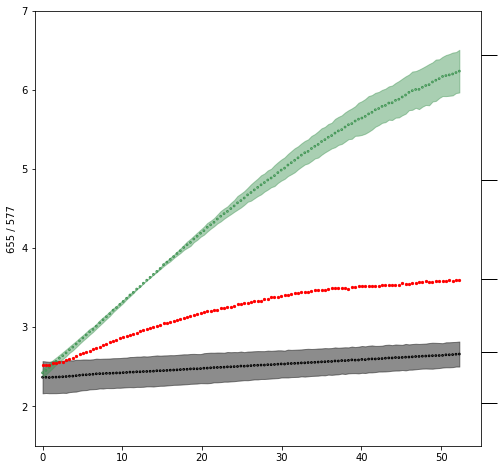

In [201]:
fig, ax1 = plt.subplots(1, figsize = (8,8))
p_neg = np.zeros((6, 125))
p_neg10 = np.zeros((2, 125))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85, 3)) 
p10_l = []
p10_u = []
p_l = []
p_u = []
mute = r'C:\Users\Meagan\Documents\pH_changing\New Figures\polarity\muted\LR_200617_neg_10mM.txt'
muted = np.loadtxt(mute, unpack = True, skiprows = 1)
mutedY = muted[1]
for i in np.arange(6.8,7.8,0.2):
    ax1.hlines(RfromPH(i, PK, RA, RB), 55,57, linewidth = 1, clip_on = False, color = 'k')

for i in range(len(pol200)):
    print(pol200[i])
    data = np.loadtxt(P+pol200[i], unpack = True, skiprows = 1)
    y = data[1]
    p_neg[i,:] = y
    
for i in range(len(pol10)):
    data2 = np.loadtxt(P+pol10[i], unpack = True, skiprows = 1)
    y2 = data2[1]
    p_neg10[i,:] = y2

neg_avg = np.mean(p_neg, axis = 0)
neg_CI = (np.std(p_neg, axis = 0)/np.sqrt(4)*2.776)  


neg_avg10 = np.mean(p_neg10, axis = 0)
neg_CI10 = (np.std(p_neg10, axis = 0)/np.sqrt(2)*4.303)  
#print(neg_avg)
print((r_avg, time))
for i in range(len(neg_avg)):
    p10_u.append(max(p_neg10[0,i], p_neg10[1,i]))
    p10_l.append(min(p_neg10[0,i], p_neg10[1,i]))
    
    p_u.append(max(p_neg[0,i], p_neg[1,i], p_neg[2,i], p_neg[3,i],p_neg[4,i]))
    p_l.append(min(p_neg[0,i], p_neg[1,i], p_neg[2,i], p_neg[3,i],p_neg[4,i]))
#ax1.fill_between(time, r_avg+r_CI, r_avg-r_CI, color = 'lightblue', alpha =  0.75)
#ax1.scatter(time, r_avg,color = 'b', s = 10, facecolor = 'none', linewidths = None)

ax1.fill_between(time, neg_avg+neg_CI, neg_avg-neg_CI, color = color[0], alpha =  0.45)
ax1.scatter(time, neg_avg,color = color[0], s = 3, facecolor = 'none', linewidths = 1)

ax1.fill_between(time, p10_l, p10_u, color = color[1], alpha =  0.45)
ax1.scatter(time, neg_avg10,color = color[1], s = 3, facecolor = 'none', linewidths = 1)
ax1.scatter(time, mutedY, color = 'r', s = 5)
#ax1.fill_between(time, r10_avg+r10_CI, r10_avg-r10_CI, color = color[2], alpha =  0.45)
#ax1.scatter(time, r10_avg,color = color[2], s = 5, facecolor = 'none', linewidths = 2)



#for i in np.arange(6.0, 7.90, 0.20):
#    ax1.hlines(RfromPH(i, PK, RA, RB), 52, 53, color = 'k', label = np.round(i,1))
#ax2.set_ylim(0.8, 2.95)
#ax2.set_yticks([2.25,2.4,2.75])
ax1.set_ylim(1.5,7)
#ax1.set_yticks([0.4, 2.25,2.4,2.5])#np.linspace(0.4, 2.5,5))
ax1.set_ylabel('655 / 577')
ax1.set_xlim(-1,55)
#ax1.legend(loc = (3,0))
#plt.savefig(hd+'\\200617_GM_polarity_2.pdf', format = 'pdf')


In [86]:
# 0 - 10 minutes = 0-24
#10 - 20 minutes = 24-48
#20-30 minutes = 48-72
#30-35 minutes = 72 - 83
#30 to end = 72:
regress(time[0:72], neg_avg10[0:72])
regress(time[0:24], neg_avg10[0:24])
regress(time[24:48], neg_avg10[24:48])
regress(time[48:72], neg_avg10[48:72])
regress(time[72:83], neg_avg10[72:83])
regress(time[72:], neg_avg10[72:])
per_change(.0554,.089)


S, F, P = stats(neg_avg10)
print(PHfromR(S, PK, RA, RB)-PHfromR(F, PK, RA, RB))

regression equation:  
0.08705 x + 2.438
Pearson correlation: [[1.        0.9996007]
 [0.9996007 1.       ]]

regression equation:  
0.08941 x + 2.415
Pearson correlation: [[1.        0.9998618]
 [0.9998618 1.       ]]

regression equation:  
0.08875 x + 2.433
Pearson correlation: [[1.         0.99990497]
 [0.99990497 1.        ]]

regression equation:  
0.07835 x + 2.648
Pearson correlation: [[1.         0.99962714]
 [0.99962714 1.        ]]

regression equation:  
0.07066 x + 2.875
Pearson correlation: [[1.         0.99868626]
 [0.99868626 1.        ]]

regression equation:  
0.0554 x + 3.401
Pearson correlation: [[1.         0.99687204]
 [0.99687204 1.        ]]

-0.378 : -37.753%
total change: 3.815
starting ratio: 2.4235
finishing ratio: 6.2385
percent change: 1.5742
-0.647902678017191


## polarity switching 

126 250
LR_200403_polarity_2.txt
2.4967442826016604
LR_200424_pol_switch_control.txt
2.3069253608837
LR_200428_pol_switch.txt
2.396380511594894


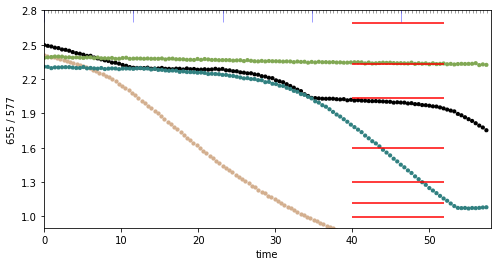

In [127]:
fig, ax = plt.subplots(figsize = (8,4))
color = mpl.cm.gist_earth(np.linspace(0.0,0.85, 4))
data2 = np.loadtxt(PS+polsw[0], unpack = True, skiprows = 1)
pol_time = data2[0]*27.8/60
linestyle = [(0, (2, 3)), (0, (5, 3, 1, 2)), '-']
switches = np.arange(0, 125, 25)
s2 = np.arange(0, 125, 1)
c = ['red', 'blue']*(len(switches))
c2 = ['red', 'blue']*(len(s2))
time_ticks = np.arange(min(pol_time), max(pol_time)+1, 0.464)
time_ticks2 = np.arange(min(pol_time), max(pol_time)+1, 11.6)
print(len(time_ticks), len(c2))

ax.scatter(time, r_avg, s = 5, color = color[3], linewidth = 2)


for i in range(len(polsw)):
    print(polsw[i])
    data2 = np.loadtxt(PS+polsw[i], unpack = True, skiprows = 1)
    x2 = data2[0]*27.8/60
    y2 = data2[1]
    print(max(y2))
    ax.scatter(x2, y2, label = sq[i], s = 5, linewidth = 2, color = color[i], linestyle = (0,(5, 3, 3, 2)))
for i in range(len(time_ticks)):
    ax.vlines(time_ticks[i], 2.78 , 2.85, linestyle = '-', color = 'k', alpha = 0.75, linewidth = 0.5)
for i in range(len(time_ticks2)):
    ax.vlines(time_ticks2[i], 2.7 , 2.85, linestyle = '-', color = 'b', alpha = 0.75, linewidth = 0.5)

    
for i in np.arange(6.0, 7.2, 0.20):
    ax.hlines(RfromPH(i, PK, RA, RB), 40, 52, color = 'r', label = np.round(i,1))
    
ax.hlines(RfromPH(6.9, PK, RA, RB), 40, 52, color = 'r', label = np.round(i,1))
#ax.legend()
#ax.hlines(RfromPH(6.95, PK, RA, RB), 40, 52, color = 'b', linewidth = 2, zorder = 0)
#ax.hlines(RfromPH(6.9, PK, RA, RB), 40, 52, color = 'k', linewidth = 2, linestyle = '-')
#ax.hlines(RfromPH(6.5, PK, RA, RB),  40, 52, color = 'k', linewidth = 2, linestyle = '-')
#ax.hlines(RfromPH(6.0, PK, RA, RB),  40, 52, color = 'k', linewidth = 2, linestyle = (0, (2,3)) )
ax.set_ylim(0.9, 2.75)
ax.set_ylabel('655 / 577')
ax.set_xlabel('time')
ax.set_xlim(0,58)
ax.set_yticks(np.arange(1.0, 2.9,.3))
#plt.savefig(hd+'\\polarity_switching_v05.pdf', format = 'pdf')